# Analisando um sistema de acordo com sua equação diferencial:

A análise de circuitos RC é feita aplicando as leis de Kirchhoff tal qual foi feito para os circuitos resistivos (ver aula anterior). 
O objetivo da análise é determinar a resposta do circuito, que nesse caso é a tensão $v(t)$ no capacitor.

Considere, portanto um circuito RC.

A equação diferencial que explica o funcionamento desse sistema é definida abaixo:

\begin{equation}
\begin{split}
& v'(t)+ \frac{1}{CR}v(t) = 0 \\ & v'(t) = - \frac{1}{CR}v(t)
\end{split}
\end{equation}





Vamos modelar e analisar rapidamente este sistema otilizando o pacote `scipy` do python:

In [2]:
# importanto pacote 

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [7]:
# funcao que retorna dv/dt
def dv_dt(v,t,r,c):
    dvdt = -(1/(c*r)) * v
    return dvdt

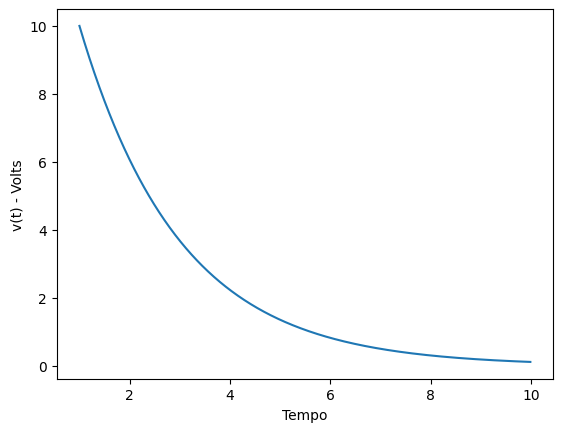

In [8]:
# Condicao inicial do sistema
v_0 = 10 #volts
# parametros do sistema
C=0.2 #farad
R=10 #ohm

# Taxa de amostragem do sinal que iremos gerar
taxa = 1000
# Amostrando o sinal no tempo
t = np.linspace(1, 10, taxa, endpoint=False)
v = odeint(dv_dt, v_0,t, args=(R,C))

# plot results
plt.plot(t,v)
plt.xlabel('Tempo')
plt.ylabel('v(t) - Volts')
plt.show() 

# Analisando sistemas de acordo com suas propriedades

## Sistema Causal e não causal

Para que o sistema seja **causal**, ele deve ser **independente apenas dos valores futuros**. Isso significa que a dependência passada não causará nenhum problema para o sistema se tornar causal.

Os sistemas causais são sistemas praticamente ou fisicamente realizáveis. 
Vamos considerar alguns exemplos para entender isso muito melhor.

### Ex. 1. 

$S: x(t) \rightarrow y(t) = x(t)$

In [ ]:
# importanto pacote 

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [ ]:
# Taxa de amostragem do sinal 
taxa = 1000
# Definindo o domínio no tempo
t = np.linspace(0, 3, taxa, endpoint=False)

# entrada = x(t)
x_t = lambda x : x
entrada = np.array([x_t(ti) for ti in t])

In [ ]:
# Visualizando x(t)
plt.plot(t,entrada, color='orange', linewidth=2)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend(["$x(t)$"])
plt.grid()
plt.show() 

In [ ]:
# saida = y(t)
y_t = x_t
saida = np.array([y_t(ti)for ti in t]) 

In [ ]:
# # Visualizando x(t) e y(t)
plt.plot(t,entrada, color='orange', linewidth=2)
plt.plot(t,saida, color='green', linestyle='dashed')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend(["$x(t)$", "$y(t)$"])
plt.grid()
plt.show() 

Aqui, o sinal y depende apenas dos valores atuais de x. 
Por exemplo, se substituirmos t = 3, o resultado y será exibido apenas para aquele instante de tempo. Portanto, como não depende de valor futuro, podemos chamá-lo de **sistema Causal**.

### Ex. 2. 

$S: x(t) \rightarrow y(t) = x(t-1)$



In [ ]:
# saida = y(t)
y_t = lambda x: x_t(x-1)
saida = np.array([y_t(ti)for ti in t]) 

In [ ]:
# Visualizando x(t) e x(t)
plt.plot(t,entrada, color='orange', linewidth=2)
plt.plot(t,saida, color='green', linestyle='dashed')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend(["$x(t)$", "$y(t)$"])
plt.grid()
plt.show() 

Aqui, o sistema depende de valores passados de x. 
Por exemplo, se substituirmos $t = 3$, a expressão será reduzida para $x(t=2)$, que é um valor passado em relação à nossa entrada. Em nenhum caso,$y(t)$ depende de valores futuros. Portanto, esse sistema também é um **sistema causal**.

### Ex. 3. 

$S: x(t) \rightarrow y(t)=x(t)+x(t+1)$

In [ ]:
# saida = y(t)
y_t = lambda x: x_t(x) + x_t(x+1)
saida = np.array([y_t(ti)for ti in t]) 

In [ ]:
# Visualizando x(t) e y(t)
plt.plot(t,entrada, color='orange', linewidth=2)
plt.plot(t,saida, color='green', linestyle='dashed')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend(["$x(t)$", "$y(t)$"])
plt.grid()
plt.show() 

Neste caso, o sistema tem duas partes:
* a parte $x(t)$, como discutimos anteriormente, depende apenas dos valores presentes. Portanto, não há nenhum problema com isso. 
* No entanto, $x(t+1)$ depende claramente dos valores futuros porque se colocarmos t = 1, a expressão se reduzirá a $x(t=2)$ que é o valor futuro. Portanto, o sistema **não é causal**.

<!-- A equação diferencial ordinária que governa o movimento do pêndulo é a chamada "equação de Mathieu":

$$\theta''(t) + \frac{g}{l} \sin(\theta) = 0$$

![Pendulo](figs/PenduloTmg.gif) -->

## Sistema Linear e não linear

### Ex. 1.

$S: x(t) \rightarrow y(t) = sen(t)x(t)$

In [ ]:
# Taxa de amostragem do sinal 
taxa = 1000
# Definindo o domínio no tempo
t = np.linspace(0, 3, taxa, endpoint=False)
a = 1
b = 1

# entrada : x_3(t) = a*x_1(t) + b*x_2(t)
x_t_1 = lambda x : x
x_t_2 = lambda x : x**2
x_t_3 = lambda x: a*x_t_1(x) + b*x_t_2(x)

entrada_1 = np.array([x_t_1(ti) for ti in t])
entrada_2 = np.array([x_t_2(ti) for ti in t])
entrada_3 = np.array([x_t_3(ti) for ti in t])

In [ ]:
# Visualizando x_1(t), x_2(t) e x_3(t)
plt.plot(t,entrada_1, color='orange', linewidth=2)
plt.plot(t,entrada_2, color='brown', linewidth=2)
plt.plot(t,entrada_3, color='magenta', linewidth=2)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend(["$x_1(t)$", "$x_2(t)$", "$x_3(t)= ax_1(t) + bx_2(t)$"])
plt.grid()
plt.show() 

In [ ]:
# saida y_3(t)
y_t_3 = lambda x: x_t_3(x)*np.sin(x)
saida_3 = np.array([y_t_3(ti) for ti in t]) 

# plot results
plt.plot(t,entrada_3, color='magenta', linewidth=2)
plt.plot(t,saida_3, color='green', linestyle='dashed')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend(["$x_3(t)$", "$y_3(t)$"])
plt.grid()
plt.show() 

In [ ]:
# para verificar se o sistema eh linear precisamos computar a saída esperada y_3_1(t) como combinação de y_1 e y_2
y_t_1 = lambda x: x_t_1(x)*np.sin(x)
y_t_2 = lambda x: x_t_2(x)*np.sin(x)
y_t_3_1 = lambda x: a*y_t_1(x) + b*y_t_2(x)

saida_3_1 = np.array([y_t_3_1(ti) for ti in t]) 

In [ ]:
# visualidando a saida do sistema y_3 e a saída esperada y_3_1
plt.plot(t,saida_3)
plt.plot(t,saida_3_1)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend(["saida sistema: $y_3(t)$", "saida esperada: $y_3(t) = ay_1(t) + by_2(t)$"])
plt.grid()
plt.show() 